<a href="https://colab.research.google.com/github/svf5398/ParentPaper/blob/main/Modified_Implementation_Platform/Novel_Idea_CombinedChild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Child Datasets: Pre-processing**

First, I began by importing the required packages. Then, I imported the Child 2017 and Child 2018 datasets as CSV files.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Child_Data_2017 = pd.read_csv('Child-Data2017.csv', na_values='?')
Child_Data_2018 = pd.read_csv('Child-Data2018.csv', na_values='?')

## MY ADDED CODE BLOCK:

I pre-processed the Child 2017 and Child 2018 datasets because they both contain the same data, but their column names slightly differ. Therefore, I renamed the columns of the Child 2018 dataset so they would match the column names of the Adult 2017 dataset in order to combine them. I renamed the classification column in both datasets to "ASD," which indicates if each case does or does not have autism. Last, I dropped the identifier column for all patients in both datasets. 

In [ ]:
Child_Data_2017 = Child_Data_2017.drop(columns='id')
Child_Data_2018 = Child_Data_2018.drop(columns='Case No')
Child_Data_2018 = Child_Data_2018.drop(columns='Language')
Child_Data_2018 = Child_Data_2018.drop(columns='Why taken the screening ')
Child_Data_2017 = Child_Data_2017.rename(columns={'Class/ASD':'ASD'})
Child_Data_2018 = Child_Data_2018.rename(columns={'A1': 'A1_Score', 'A2': 'A2_Score', 'A3': 'A3_Score', 'A4': 'A4_Score', 'A5': 'A5_Score', 'A6': 'A6_Score', 'A7': 'A7_Score', 'A8': 'A8_Score', 'A9': 'A9_Score', 'A10': 'A10_Score', 'Age': 'age', 'Sex': 'gender', 'Ethnicity': 'ethnicity', 'Jaundice ': 'jundice', 'Family_ASD': 'austim', 'Residence': 'contry_of_res', 'Used_App_Before': 'used_app_before', 'Score': 'result', 'Screening Type': 'age_desc', 'User': 'relation', 'Class': 'ASD'})

## MY ADDED CODE BLOCK:

Here, the Child 2017 and Child 2018 datasets are combined to make a larger dataset represetning 801 children.

In [ ]:
Child_Data_Combined = Child_Data_2017.append(Child_Data_2018, ignore_index=True)
Child_Data_Combined

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,1,1,1,1,1,1,0,1,1,...,m,hispanic,no,no,United States,no,9,4-11 years,parent,YES
797,1,0,1,0,1,1,1,1,0,1,...,m,white,no,no,"Virgin Islands, British",no,7,4-11 years,parent,YES
798,1,1,1,1,0,1,0,0,1,1,...,m,middle eastern,no,yes,Jordan,no,7,4-11 years,parent,YES
799,1,1,1,0,0,1,0,1,1,1,...,f,asian,no,no,United Kingdom,no,7,4-11 years,parent,YES


## MY ADDED CODE BLOCK:

For the combined dataset, I am searching under the "ASD" classification column and counting how many cases are given the values "YES" and "NO." This is done because there is an imbalance between the classification data, with bias towards cases labelled "NO." This imbalance can impact the accuracy of the machine learning models, meaning they may not truly represent correct evaluation metrics and accuracy in predicting ASD cases.

In [ ]:
Child_Data_Combined['ASD'].value_counts()

NO     403
YES    398
Name: ASD, dtype: int64

## MY ADDED CODE BLOCK:

Here, I am normalizing the dataset to ensure that there are an equal amount of ASD and non-ASD cases in the "ASD" column. Since there are more "NO" cases than "YES" cases (403 no vs 398 yes), I sampled 398 "NO" cases to return a random selection of these cases. I combined these specific "NO" cases with the 398 "YES" cases to create the final dataset.

In [ ]:
class_no = Child_Data_Combined.query('ASD == "NO"').sample(n=398)
class_yes = Child_Data_Combined.query('ASD == "YES"')
Child_Data_Combined = pd.concat([class_no,class_yes], axis=0)
Child_Data_Combined

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ASD
298,0,1,1,0,0,1,0,0,1,1,...,f,latino,yes,no,Philippines,no,5,4-11 years,health care professional,NO
714,0,1,1,1,0,1,0,0,1,0,...,m,asian,no,yes,Bangladesh,no,5,4-11 years,parent,NO
263,0,1,1,0,0,1,1,0,1,1,...,m,Asian,no,no,India,yes,6,4-11 years,Relative,NO
156,0,1,0,0,0,1,1,1,1,1,...,f,Asian,no,no,United Kingdom,no,6,4-11 years,Parent,NO
231,0,1,1,0,0,1,1,0,0,1,...,m,NaN,yes,no,Libya,no,5,4-11 years,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,1,0,0,1,1,1,1,1,1,1,...,m,asian,no,yes,Philippines,yes,8,4-11 years,parent,YES
796,1,1,1,1,1,1,1,0,1,1,...,m,hispanic,no,no,United States,no,9,4-11 years,parent,YES
797,1,0,1,0,1,1,1,1,0,1,...,m,white,no,no,"Virgin Islands, British",no,7,4-11 years,parent,YES
798,1,1,1,1,0,1,0,0,1,1,...,m,middle eastern,no,yes,Jordan,no,7,4-11 years,parent,YES


In [ ]:
for column in Child_Data_Combined.columns:
    if Child_Data_Combined[column].dtype == type(object):
        le = LabelEncoder()
        Child_Data_Combined[column] = le.fit_transform(Child_Data_Combined[column].astype(str))
Child_Data_Combined.drop(['age_desc'] ,  axis = 1, inplace = True)
Child_Data_Combined.replace("?",np.nan,inplace=True) #replace ? with nan

In [ ]:
total_missing_data = Child_Data_Combined.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (Child_Data_Combined.isnull().sum()/Child_Data_Combined.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
age,4,0.502513
A2_Score,0,0.000000
relation,0,0.000000
result,0,0.000000
used_app_before,0,0.000000
contry_of_res,0,0.000000
austim,0,0.000000
jundice,0,0.000000
ethnicity,0,0.000000
gender,0,0.000000


# Missing Data mean value or dropna():

In [ ]:
Child_Data_Combined.loc[(Child_Data_Combined['age'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,ASD
138,0,1,1,0,1,1,1,1,0,0,NaN,1,16,1,0,55,1,6,6,0
65,0,0,1,0,0,0,0,0,0,0,NaN,1,4,0,0,39,0,1,1,0
32,1,0,0,1,0,1,1,1,1,1,NaN,1,16,0,0,24,0,7,6,1
126,1,1,1,1,0,1,0,1,0,1,NaN,1,16,1,0,39,0,7,6,1


In [ ]:
Child_Data_Combined.age[32]=Child_Data_Combined.age.median()
Child_Data_Combined.age[65]=Child_Data_Combined.age.median()
Child_Data_Combined.age[126]=Child_Data_Combined.age.median()
Child_Data_Combined.age[138]=Child_Data_Combined.age.median()
Child_Data_Combined.loc[(Child_Data_Combined['age'].isnull())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,ASD


#ANOVA

In [ ]:
X_Feature = Child_Data_Combined.iloc[:,0:19]  #independent columns
Y_Feature = Child_Data_Combined.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

            Feature        Score
0          A1_Score   132.727099
1          A2_Score    39.224805
2          A3_Score   150.176210
3          A4_Score   403.638286
4          A5_Score   149.255063
5          A6_Score   193.128611
6          A7_Score    82.060999
7          A8_Score   182.367753
8          A9_Score   213.004999
9         A10_Score   161.633606
10              age     5.383995
11           gender     0.740615
12        ethnicity     0.055071
13          jundice     0.163874
14           austim     0.441461
15    contry_of_res     1.145622
16  used_app_before     0.553214
17           result  1793.179267
18         relation     0.482454


In [ ]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
            Feature        Score
17           result  1793.179267
3          A4_Score   403.638286
8          A9_Score   213.004999
5          A6_Score   193.128611
7          A8_Score   182.367753
9         A10_Score   161.633606
2          A3_Score   150.176210
4          A5_Score   149.255063
0          A1_Score   132.727099
6          A7_Score    82.060999
1          A2_Score    39.224805
10              age     5.383995
15    contry_of_res     1.145622
11           gender     0.740615
16  used_app_before     0.553214


#Chi Test

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1_Score,39.099426
1,A2_Score,17.041475
2,A3_Score,31.333890
3,A4_Score,121.330275
4,A5_Score,34.336788
5,A6_Score,45.390071
6,A7_Score,29.318841
7,A8_Score,75.086294
8,A9_Score,86.089974
9,A10_Score,38.563380


In [ ]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
            Feature       Score
17           result  464.351177
3          A4_Score  121.330275
8          A9_Score   86.089974
7          A8_Score   75.086294
5          A6_Score   45.390071
0          A1_Score   39.099426
9         A10_Score   38.563380
4          A5_Score   34.336788
2          A3_Score   31.333890
6          A7_Score   29.318841
1          A2_Score   17.041475
15    contry_of_res   14.125183
10              age    4.853121
18         relation    0.739790
16  used_app_before    0.533333


#Correlation

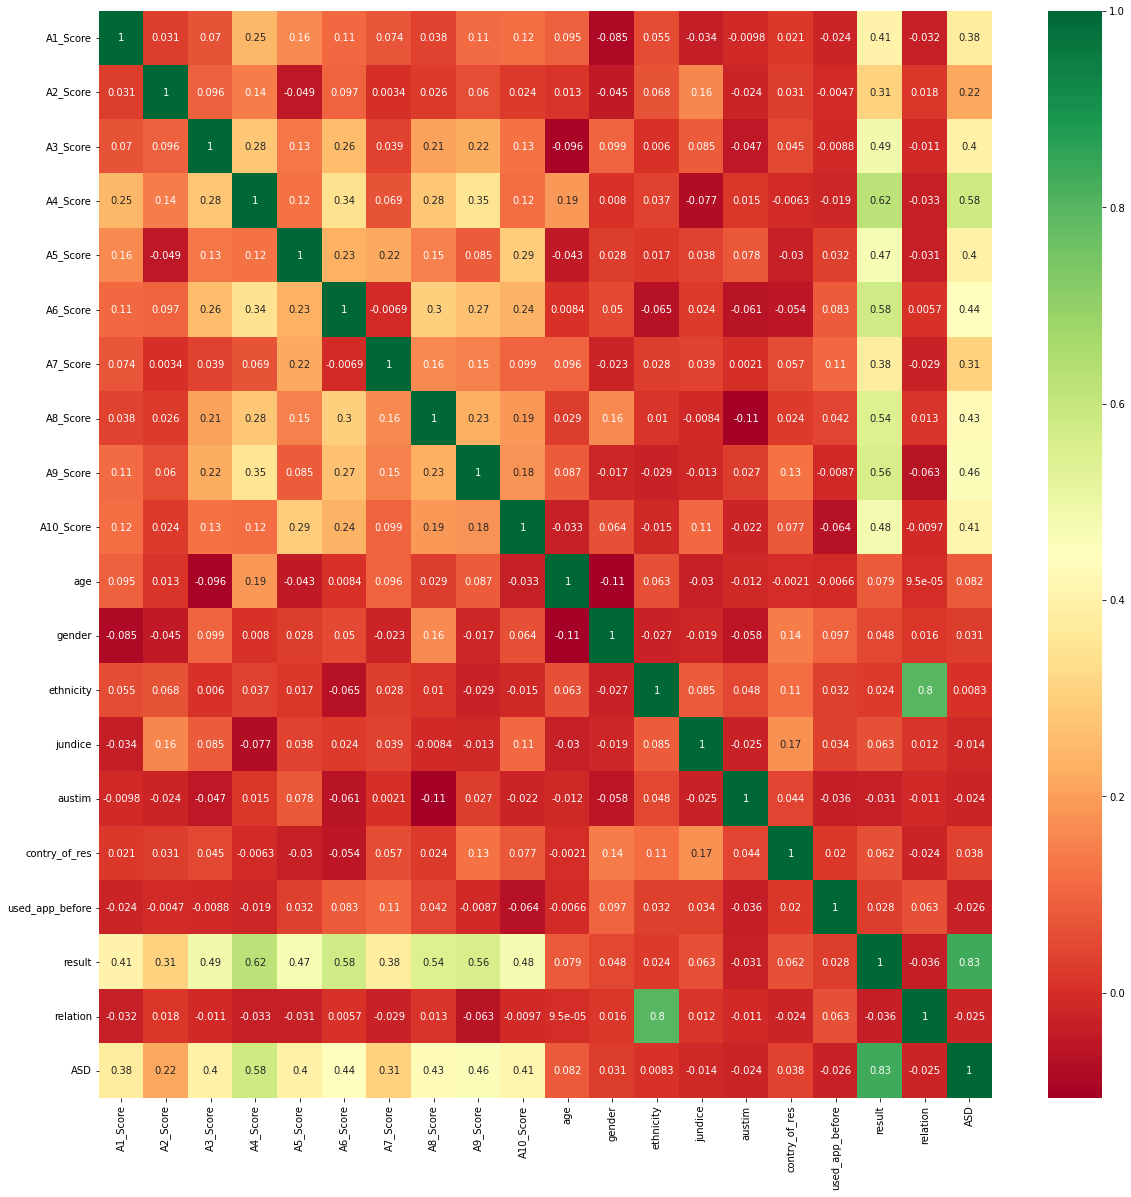

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = Child_Data_Combined.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Child_Data_Combined[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Child Datasets: Models**

## MODIFIED CODE: ADDED HYPERPARAMETER TUNING

In [ ]:
import time
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  LabelEncoder
import pandas as pd
import numpy as np

Child_Data_Combined.rename(columns={'ASD': 'class'}, inplace=True)

for column in Child_Data_Combined.columns:
    if Child_Data_Combined[column].dtype == type(object):
        le = LabelEncoder()
        Child_Data_Combined[column] = le.fit_transform(Child_Data_Combined[column].astype(str))

names = []
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(kernel='linear'))) # hyperparameter tuning -> complete success
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier())) 
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

X=Child_Data_Combined[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
Y=Child_Data_Combined['class']

start_time = 0
elapsed_time = 0
confusion=0
pred=0

#Cross Validation

In [ ]:
seed = 7
kfold = KFold(n_splits=10) # removed parameter "random state=seed" because it gave an error. Removing parameter did not affect output
for name, m in models:
    start_time = time.time()
    pred = cross_val_predict(m, X,Y, cv=kfold )
    elapsed_time = time.time() - start_time   
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    error = (FP + FN) / float(TP + TN + FP + FN) # equal #error_rate = 1 - accuracy
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================')      

LR
0.1221
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.0946
96.3568
93.7186
98.9950
96.3568
96.4504
3.6432
CART
0.0693
98.2412
97.9899
98.4925
98.2412
98.2456
1.7588
NB
0.0626
89.3216
92.2111
86.4322
89.3216
89.0039
10.6784
KNN
0.1355
93.3417
96.7337
89.9497
93.3417
93.1079
6.6583
SVM
0.0914
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
AB
1.1413
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
1.0629
98.9950
99.4975
98.4925
98.9950
98.9899
1.0050
RF
1.8165
98.1156
98.4925
97.7387
98.1156
98.1084
1.8844
ET
1.4437
98.7437
98.7437
98.7437
98.7437
98.7437
1.2563


#Leave

In [ ]:
num_folds = 10
for name, m in models: 
    loocv = LeaveOneOut() 
    start_time=time.time()
    pred = cross_val_predict(m, X,Y, cv=loocv )
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================') 

LR
8.8751
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
5.1420
97.3618
94.9749
99.7487
97.3618
97.4233
2.6382
CART
3.9868
98.4925
97.9899
98.9950
98.4925
98.5000
1.5075
NB
3.7720
92.4623
94.4724
90.4523
92.4623
92.3077
7.5377
KNN
4.8249
94.4724
97.4874
91.4573
94.4724
94.3005
5.5276
SVM
6.2205
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
AB
84.2182
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
83.2418
99.1206
99.2462
98.9950
99.1206
99.1195
0.8794
RF
139.8980
98.9950
98.9950
98.9950
98.9950
98.9950
1.0050
ET
108.0804
98.7437
98.2412
99.2462
98.7437
98.7500
1.2563


#Train Test Split

In [ ]:
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
for name, m in models:
    model = m
    start_time = time.time()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y_test,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y_test, pred, average='binary')
    AUC=metrics.roc_auc_score(Y_test, pred)
    class_error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(class_error*100.0))
    print(' ====')

LR
0.0151
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
 ====
LDA
0.0113
97.4895
96.3636
98.4496
97.4066
97.6923
2.5105
 ====
CART
0.0064
96.6527
97.2727
96.1240
96.6984
96.8750
3.3473
 ====
NB
0.0091
88.2845
93.6364
83.7209
88.6786
88.5246
11.7155
 ====
KNN
0.0525
95.3975
93.6364
96.8992
95.2678
95.7854
4.6025
 ====
SVM
0.0123
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
 ====
AB
0.2812
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
 ====
GBM
0.1971
97.9079
98.1818
97.6744
97.9281
98.0545
2.0921
 ====
RF
0.4454
97.0711
97.2727
96.8992
97.0860
97.2763
2.9289
 ====
ET
0.3918
97.4895
99.0909
96.1240
97.6075
97.6378
2.5105
 ====
